In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

train = pd.read_csv("data/raw/Estate/train.csv")
test = pd.read_csv("data/raw/Estate/test_x.csv")
sample = pd.read_csv("data/raw/Estate/sample_submission.csv")
train

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type
0,Ставрополь,NaN,COL_65683,45.011356,41.919273,7,71,144,225,0,...,969.0,8.439655,9.250000,1990.232759,1993.500000,Ставропольский край,31.00,S1842,2020-02-23,10
1,Омск,NaN,COL_159011,54.984833,73.387344,4,40,109,206,0,...,305.0,4.756410,4.333333,1960.346154,1956.291667,Омская область,150.00,S14290,2020-05-24,10
2,Белгород,NaN,COL_205850,50.576805,36.563267,0,9,22,44,0,...,533.0,6.435897,6.400000,1980.452991,1989.633333,Белгородская область,73.00,S25733,2020-06-28,10
3,Большой Исток,NaN,COL_229491,56.714413,60.792454,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,Свердловская область,438.00,S6985,2020-07-19,110
4,Новосибирск,1.0,COL_77283,55.055200,82.895810,0,25,50,101,0,...,1188.0,6.830065,6.672414,1974.045752,1974.637931,Новосибирская область,62.70,S4778,2020-03-01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206469,Нижний Тагил,1.0,COL_177140,57.911450,59.961727,2,32,56,89,0,...,1031.0,5.466667,5.560000,1966.519380,1967.381818,Свердловская область,41.00,S19208,2020-06-07,100
206470,Новосибирск,NaN,COL_102032,55.067345,82.960770,1,6,8,28,0,...,939.0,6.120370,6.078947,1965.807339,1964.461538,Новосибирская область,98.30,S2332,2020-03-22,110
206471,Ставрополь,NaN,COL_253873,44.998290,41.921482,13,97,157,227,0,...,649.0,8.894737,9.214286,1997.815789,1995.928571,Ставропольский край,921.50,S1743,2020-08-02,100
206472,Санкт-Петербург,5.0,COL_186498,59.855330,30.319840,3,95,274,429,0,...,1224.0,6.386792,8.055556,1961.481132,1962.333333,Санкт-Петербург,40.01,S16774,2020-06-14,10


In [88]:
# train.isna().sum()

In [89]:
drop = ["id", "lat", "lng", "date", "street", "floor", "osm_city_nearest_name", "reform_house_population_1000", "reform_house_population_500", "reform_mean_floor_count_1000", "reform_mean_floor_count_500", "reform_mean_year_building_1000", "reform_mean_year_building_500"]
train.drop(drop, axis=1, inplace=True)
test.drop(drop, axis=1, inplace=True)
train.fillna({"osm_city_nearest_population": int(train["osm_city_nearest_population"].mean())}, inplace=True)
test.fillna({"osm_city_nearest_population": int(test["osm_city_nearest_population"].mean())}, inplace=True)


In [90]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206474 entries, 0 to 206473
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city                                 206474 non-null  object 
 1   osm_amenity_points_in_0.001          206474 non-null  int64  
 2   osm_amenity_points_in_0.005          206474 non-null  int64  
 3   osm_amenity_points_in_0.0075         206474 non-null  int64  
 4   osm_amenity_points_in_0.01           206474 non-null  int64  
 5   osm_building_points_in_0.001         206474 non-null  int64  
 6   osm_building_points_in_0.005         206474 non-null  int64  
 7   osm_building_points_in_0.0075        206474 non-null  int64  
 8   osm_building_points_in_0.01          206474 non-null  int64  
 9   osm_catering_points_in_0.001         206474 non-null  int64  
 10  osm_catering_points_in_0.005         206474 non-null  int64  
 11  osm_catering_

In [91]:
train.isna().sum()

city                            0
osm_amenity_points_in_0.001     0
osm_amenity_points_in_0.005     0
osm_amenity_points_in_0.0075    0
osm_amenity_points_in_0.01      0
                               ..
reform_count_of_houses_1000     0
reform_count_of_houses_500      0
region                          0
total_square                    0
realty_type                     0
Length: 63, dtype: int64

In [92]:
def cities_1m(df):
    cities_1m = ["Москва", "Санкт-Петербург", "Новосибирск", "Екатеринбург", "Казань", "Нижний Новгород", "Челябинск", "Самара", "Омск",
                 "Ростов-на-Дону", "Уфа", "Красноярск", "Воронеж", "Пермь", "Волгоград", "Краснодар"]

    million = []
    not_million = []

    for row in df["city"]:
        if row in cities_1m:
            million.append(1)
            not_million.append(0)
        else:
            million.append(0)
            not_million.append(1)

    df["million"] = million
    df["not_million"] = not_million

cities_1m(train)
cities_1m(test)

In [93]:
def location(df):
    moscow = []
    moscow_near = []
    saint_petersburg = []
    other = []

    for row in df["region"]:
        if row == "Москва":
            moscow.append(1)
            moscow_near.append(0)
            saint_petersburg.append(0)
            other.append(0)
        elif row == "Санкт-Петербург":
            moscow.append(0)
            moscow_near.append(0)
            saint_petersburg.append(1)
            other.append(0)
        elif row == "Московская область":
            moscow.append(0)
            moscow_near.append(1)
            saint_petersburg.append(0)
            other.append(0)
        else:
            moscow.append(0)
            moscow_near.append(0)
            saint_petersburg.append(0)
            other.append(1)
    df["moscow"] = moscow
    df["moscow_near"] = moscow_near
    df["saint_petersburg"] = saint_petersburg
    df["other"] = other

location(train)
location(test)

<AxesSubplot: >

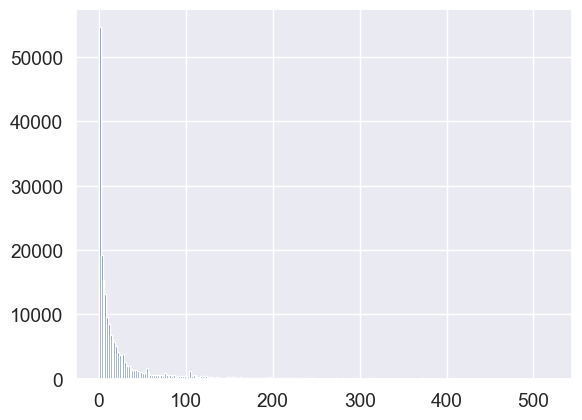

In [94]:
train["osm_catering_points_in_0.01"].hist(bins=250)

In [95]:
def food(df):
    food = []
    for i in range(len(df)):
        if df["osm_catering_points_in_0.001"][i] > 1 or df["osm_catering_points_in_0.005"][i] > 7 or df["osm_catering_points_in_0.0075"][i] > 10 or df["osm_catering_points_in_0.01"][i] > 14:
            food.append(1)
        else:
            food.append(0)
    df["food"] = food


food(train)
food(test)

In [96]:
def shops(df):
    shops = []

    for i in range(len(df)):
        if df["osm_shops_points_in_0.001"][i] > 3 or df["osm_shops_points_in_0.005"][i] > 12 or df["osm_shops_points_in_0.0075"][i] > 17 or df["osm_shops_points_in_0.01"][i] > 23:
            shops.append(1)
        else:
            shops.append(0)

    df["shops"] = shops


shops(train)
shops(test)

In [97]:
def culture(df):
    culture_objects = []

    for i in range(len(df)):
        if df["osm_culture_points_in_0.005"][i] > 0 or df["osm_culture_points_in_0.01"][i] > 1:
            culture_objects.append(1)
        else:
            culture_objects.append(0)

    df["culture_objects"] = culture_objects

culture(train)
culture(test)

In [98]:
def medecine(df):
    medicine = []
    for i in range(len(df)):
        if df["osm_healthcare_points_in_0.005"][i] > 0 or df["osm_healthcare_points_in_0.01"][i] > 1:
            medicine.append(1)
        else:
            medicine.append(0)

    df["medicine"] = medicine

medecine(train)
medecine(test)

In [99]:
def trains_stops(df):
    trains_stops = []

    for i in range(len(df)):
        if df["osm_train_stop_points_in_0.01"][i] > 0:
            trains_stops.append(1)
        else:
            trains_stops.append(0)

    df["trains_stops"] = trains_stops

trains_stops(train)
trains_stops(test)

In [100]:
# train["osm_transport_stop_points_in_0.005"].hist(bins=400)
# #"osm_transport_stop_points_in_0.01", "osm_transport_stop_points_in_0.0075", "osm_transport_stop_points_in_0.005"

In [101]:
# train["osm_transport_stop_points_in_0.0075"].hist(bins=400)
#

In [102]:
# train["osm_transport_stop_points_in_0.01"].hist(bins=400)


In [103]:
def transport_stops(df):
    transport_stops = []

    for i in range(len(df)):
        if df["osm_transport_stop_points_in_0.005"][i] > 5 or df["osm_transport_stop_points_in_0.0075"][i] > 12 or df["osm_transport_stop_points_in_0.01"][i] > 18:
            transport_stops.append(1)
        else:
            transport_stops.append(0)

    df["transport_stops"] = transport_stops

transport_stops(train)
transport_stops(test)

In [104]:
def hotels(df):
    hotels = []

    for i in range(len(df)):
        if df["osm_hotels_points_in_0.01"][i] > 3:
            hotels.append(1)
        else:
            hotels.append(0)

    df["hotels"] = hotels

hotels(train)
hotels(test)

In [105]:
train.isna().sum()

city                            0
osm_amenity_points_in_0.001     0
osm_amenity_points_in_0.005     0
osm_amenity_points_in_0.0075    0
osm_amenity_points_in_0.01      0
                               ..
culture_objects                 0
medicine                        0
trains_stops                    0
transport_stops                 0
hotels                          0
Length: 76, dtype: int64

In [106]:
train = train.assign(
    osm_city_closest_dist_15 = (train.osm_city_closest_dist <= 15).astype(int),
    osm_city_closest_dist_30 = ((train.osm_city_closest_dist > 15) & (train.osm_city_closest_dist <= 30)).astype(int),
    osm_city_closest_dist_ = (train.osm_city_closest_dist > 30).astype(int)
)
test = test.assign(
    osm_city_closest_dist_15 = (test.osm_city_closest_dist <= 15).astype(int),
    osm_city_closest_dist_30 = ((test.osm_city_closest_dist > 15) & (test.osm_city_closest_dist <= 30)).astype(int),
    osm_city_closest_dist_ = (test.osm_city_closest_dist > 30).astype(int)
)

In [107]:
# train.osm_city_closest_dist_15.hist()
# train.osm_city_closest_dist_70.hist()
# train.osm_city_closest_dist_.hist()

In [108]:
train = pd.get_dummies(train, columns=["realty_type"])
test = pd.get_dummies(test, columns=["realty_type"])

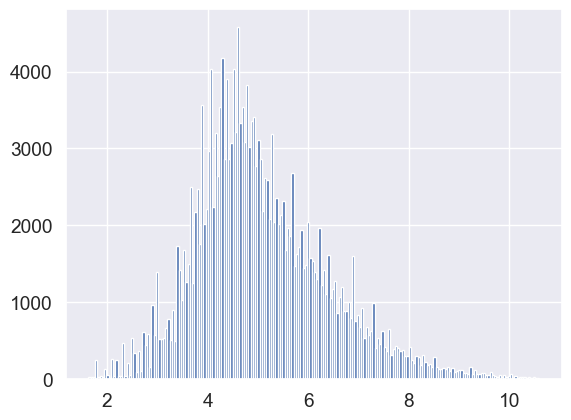

In [109]:
# train["total_square"].hist(bins=200)
np.log(train["total_square"]).hist(bins=200)
train["total_square_log"] = np.log(train["total_square"])
test["total_square_log"] = np.log(test["total_square"])

<AxesSubplot: >

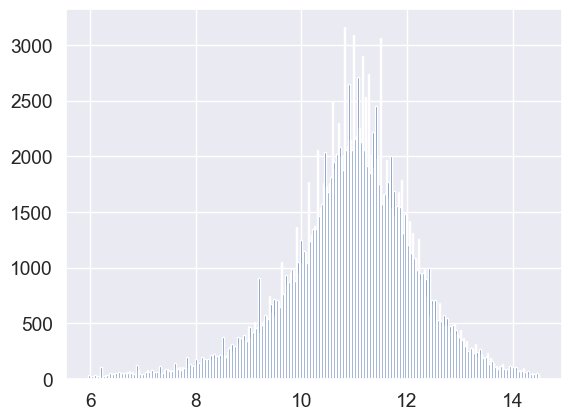

In [110]:
# train["per_square_meter_price"].hist(bins=300)
train["per_square_meter_price_log"] = np.log(train["per_square_meter_price"])
train["per_square_meter_price_log"].hist(bins=300)

0      94675
1      40771
2      20116
3      11280
4       6548
       ...  
120        1
136        1
151        1
135        1
129        1
Name: osm_hotels_points_in_0.01, Length: 146, dtype: int64

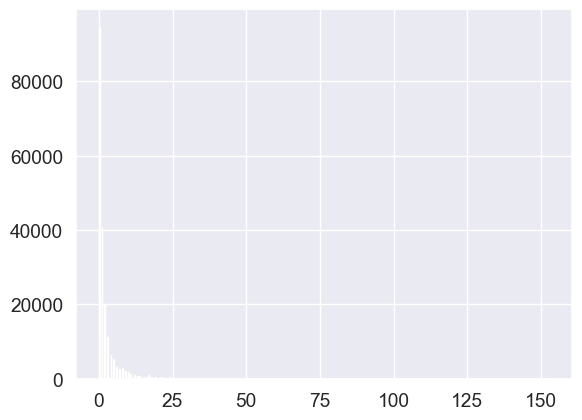

In [111]:
train["osm_hotels_points_in_0.01"].hist(bins=500)
train["osm_hotels_points_in_0.01"].value_counts()

In [133]:
# Матрица корреляции

corrmat = train[["per_square_meter_price","per_square_meter_price_log",
                 "total_square_log", "total_square", "total_square_log_n",
                 "realty_type_10", "realty_type_100", "realty_type_110",
                 "medicine",
                 "culture_objects",
                 "shops",
                 "food",
                 "trains_stops",
                 "transport_stops",
                 "hotels",
                 "moscow", "moscow_near", "saint_petersburg", "other",
                 "million", "not_million",
                 "osm_city_closest_dist_15", "osm_city_closest_dist_30",  "osm_city_closest_dist_",
                 "reform_count_of_houses_500", "reform_count_of_houses_1000",
                 "osm_train_stop_points_in_0.01", "osm_train_stop_points_in_0.005", "osm_train_stop_points_in_0.0075",
                 "osm_transport_stop_points_in_0.01", "osm_transport_stop_points_in_0.0075", "osm_transport_stop_points_in_0.005",
                 "osm_transport_stop_closest_dist",
                 "osm_hotels_points_in_0.005", "osm_hotels_points_in_0.0075", "osm_hotels_points_in_0.01",
                 "osm_historic_points_in_0.01", "osm_historic_points_in_0.0075",
                 "osm_offices_points_in_0.001"
                 ]].corr()
# corrmat = train.drop([
# "osm_city_nearest_population",
# "reform_house_population_1000",
# "reform_house_population_500",
# "reform_mean_floor_count_1000",
# "reform_mean_floor_count_500",
# "reform_mean_year_building_1000",
# "reform_mean_year_building_500"],
# axis=1).corr()
# _ = plt.subplots(figsize=(20, 10))
# sns.heatmap(corrmat, vmax=.8, square=True);

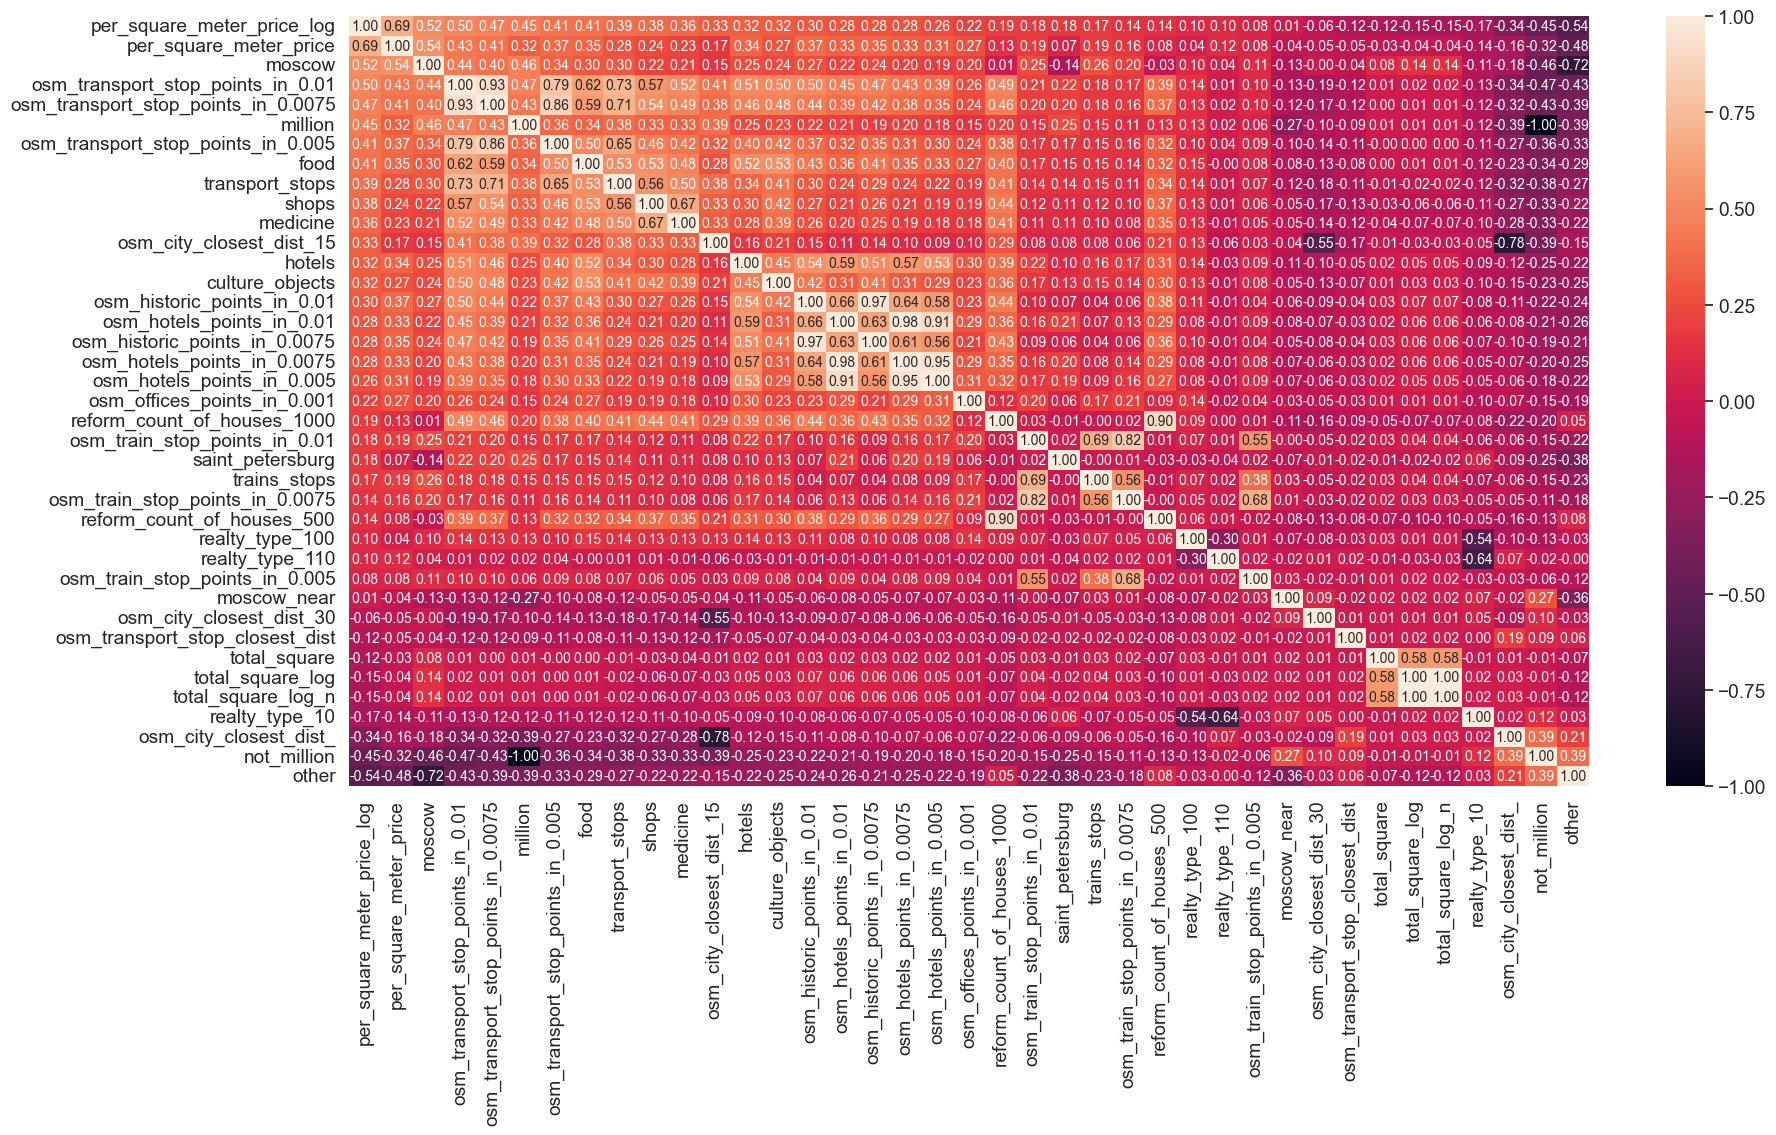

In [134]:
k = 40
cols = corrmat.nlargest(k, "per_square_meter_price_log")["per_square_meter_price_log"].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
_ = plt.subplots(figsize=(20, 10))

hm = sns.heatmap(cm, cbar=True, annot=True,# square=True,
                 fmt=".2f", annot_kws={"size": 10},
                 yticklabels=cols.values, xticklabels=cols.values
                 )

0.061 // 0.88

In [114]:
def feature_regressor(df, feature):

    x_train, x_test, y_train, y_test = train_test_split(df[feature], df["per_square_meter_price_log"], test_size=0.4, random_state=4)

    # Train
    linear = LinearRegression(n_jobs=-1)
    linear.fit(x_train, y_train)

    # Predict
    predictions = linear.predict(x_test)
    # plt.hist(y_test, bins=300)
    # plt.hist(predictions, bins=300)
    # plt.show()
    best = mean_absolute_percentage_error(np.exp(y_test), np.exp(predictions))
    save = ()
    for j in np.linspace(-1, 1, num=80):
        for i in np.linspace(0, 0.75, num=200):
            cur = mean_absolute_percentage_error(np.exp(y_test), np.exp((predictions + j)/(1+i)))
            if best > cur:
                best = cur
                save = (j, i)
            # print(f"move: {j}, scale: {i}, error {mean_absolute_percentage_error(np.exp(y_test), np.exp((predictions + j)/(1+i)))}")
    # # predictions.apply(lambda x: 300000 if x > 300000 else x)
    # plt.show()
    best2 = best
    k = 0
    for i in np.linspace(-0.1, 0.1, num=30):
        cur = mean_absolute_percentage_error(np.exp(y_test), np.exp((predictions + save[0])/(1+save[1])) / (1 + i))
        if best2 > cur:
            best2 = cur
            k = i
    return save, best, k, best2


In [127]:
feature = [
    "total_square_log",
    #"osm_city_closest_dist_15", "osm_city_closest_dist_30",  "osm_city_closest_dist_",
    "realty_type_10", "realty_type_100", "realty_type_110",
    #"osm_city_closest_dist",
    "million", "not_million",
    #"osm_transport_stop_points_in_0.01", "osm_transport_stop_points_in_0.0075", "osm_transport_stop_points_in_0.005",
    # "osm_train_stop_points_in_0.01",
    # "osm_train_stop_points_in_0.005",
    # "osm_train_stop_points_in_0.0075",
    # "trains_stops",
    "transport_stops",
    "moscow",
    #"moscow_near",
    "saint_petersburg",
    "other",
    "food",

    "shops",
    "medicine",
    "hotels",
    "culture_objects"]
# feature = ["osm_city_closest_dist_15", "osm_city_closest_dist_30",  "osm_city_closest_dist_", "realty_type_10", "realty_type_100", "realty_type_110", "osm_city_closest_dist", "million", "not_million", "moscow", "moscow_near", "saint_petersburg", "other", "food", "shops", "medicine"]
# feature_regressor(train, feature)

In [128]:
feature_regressor(train, feature)

((1.0, 0.28266331658291455),
 0.8934441936324218,
 -0.02413793103448275,
 0.8934105767085443)

1.5113017110438443
0.892955037830745
0.8933929474002407

In [121]:
def get_result(train, test, feature):
    # Train
    linear = LinearRegression()
    linear.fit(train[feature], train["per_square_meter_price_log"])

    # Predict
    predictions = linear.predict(test[feature])

    return predictions

predictions = get_result(train, test, feature)
# predictions /= 1.15
# predictions -= 1.5

print(predictions)
# predictions = np.exp((predictions + 1.9919919919919922)/1.17)
predictions = np.exp((predictions + 1)/1.28266331658291455) / (1 -0.02413793103448275)

[11.54914856 10.19218445 10.62689209 ... 11.57441711 12.65103149
 10.98975372]


In [122]:
next = np.column_stack((np.arange(0, len(predictions)), predictions))
# print(next)
out = pd.DataFrame(next, columns=["id", "per_square_meter_price"])
out["id"] = out["id"].astype(int)
# out["per_square_meter_price"].hist()
mean = out[out["per_square_meter_price"] > 0.0].per_square_meter_price.mean()
# mode = out[out["per_square_meter_price"] > 0.0].mode()

out["per_square_meter_price"] = out["per_square_meter_price"].apply(lambda x: 0.0 if x < 0.0 else x)
# out = out.assign(
#     per_square_meter_price = (mean if (out.per_square_meter_price < 0.0) else out.per_square_meter_price).astype(float)
# )
# print(mode, mean)
# print(mode)

In [123]:
out["per_square_meter_price"] = out["per_square_meter_price"].apply(lambda x: 300000 if x > 300000 else x)


In [124]:
out.to_csv("data/processed/Estate/predicts.csv", index=False)
print("saved")

saved


sort by id org, type
